In [2]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np


In [6]:
df= {}
df["Frequency"] = np.arange(1,101,1)

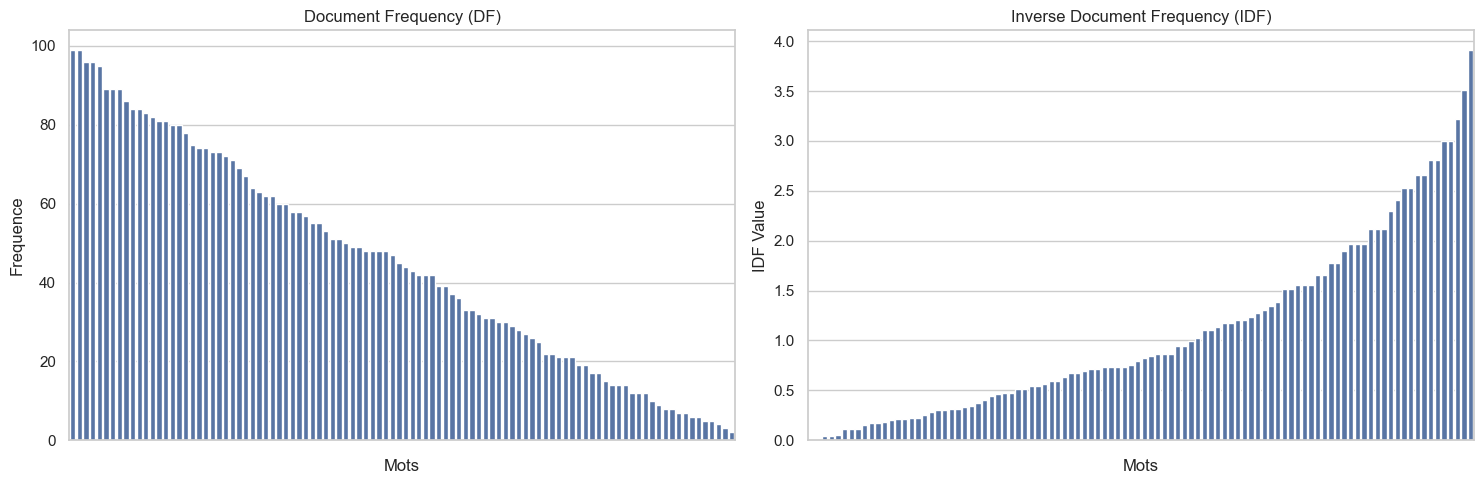

In [9]:

# Create a DataFrame with words and their counts
data = {
    "Word": [f"word{i}" for i in range(1, 101)],
    "Count": np.random.randint(1, 101, 100)
}
df = pd.DataFrame(data)

# Calculate document frequency (df) and inverse document frequency (idf)
df['Document_Frequency'] = df['Count']

df['IDF'] = np.log((100 / df['Document_Frequency']))

# Set up the subplots
sns.set_theme(style="whitegrid",)
fig, axes = plt.subplots(1, 2, figsize=(15, 5), sharey=False)

# Plot document frequency
sns.barplot(x='Word', y='Document_Frequency', data=df.sort_values('Document_Frequency', ascending=False),
            ax=axes[0])
axes[0].set_title("Document Frequency (DF)")
axes[0].set_xticklabels([])  # Hide x-axis labels for readability
axes[0].set_xlabel("Mots")
axes[0].set_ylabel("Frequence")

# Plot inverse document frequency
sns.barplot(x='Word', y='IDF', data=df.sort_values('Document_Frequency', ascending=False),
            ax=axes[1])
axes[1].set_title("Inverse Document Frequency (IDF)")
axes[1].set_xticklabels([])  # Hide x-axis labels for readability
axes[1].set_xlabel("Mots")
axes[1].set_ylabel("IDF Value")

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [8]:
df[df["Count"]>90]

,Word,Count,Document_Frequency,IDF
0,word1,98,98,0.703300
4,word5,98,98,0.703300
8,word9,98,98,0.703300
10,word11,95,95,0.719123
15,word16,95,95,0.719123
24,word25,95,95,0.719123
25,word26,97,97,0.708493
27,word28,95,95,0.719123
31,word32,99,99,0.698185
33,word34,93,93,0.730091


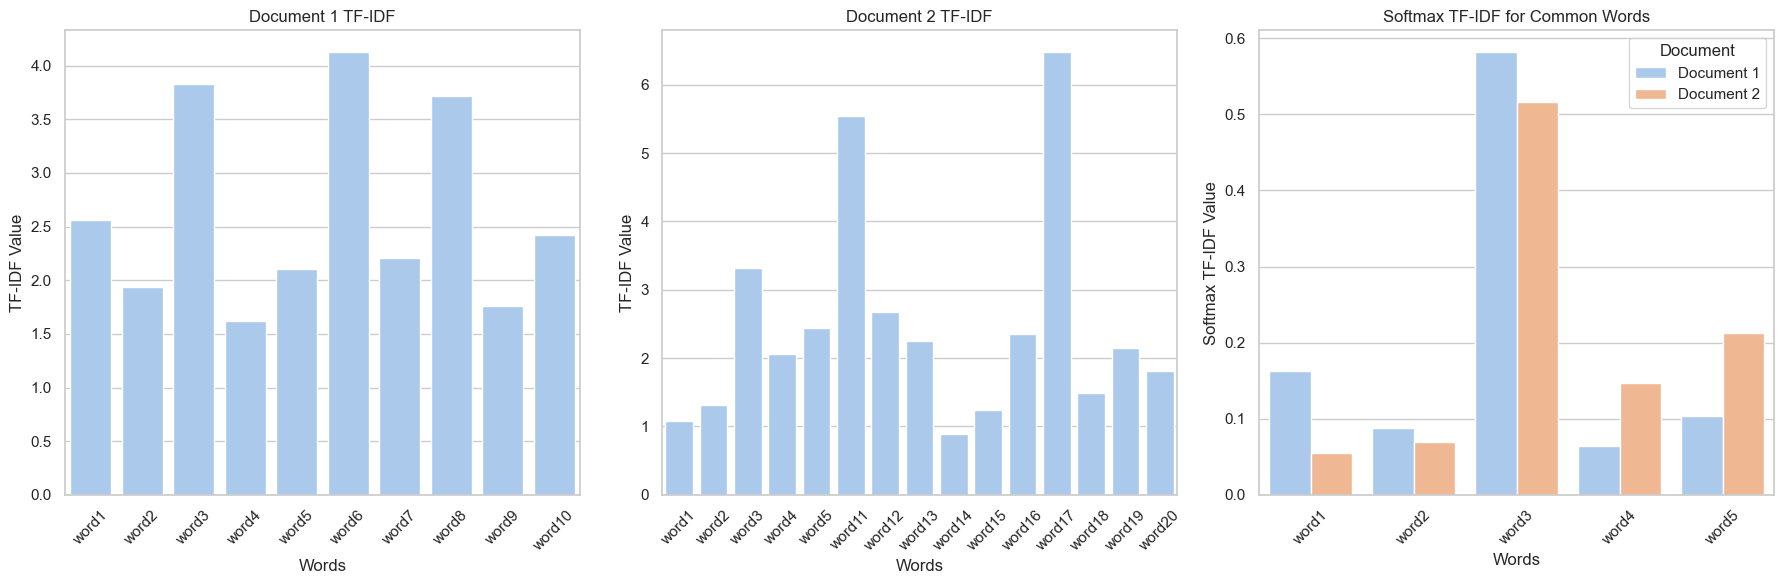

In [38]:

from scipy.special import softmax

# Step 1: Create a DataFrame with words and their counts
data = {
    "Word": [f"word{i}" for i in range(1, 101)],
    "Count": np.random.randint(1, 101, 100)
}
df = pd.DataFrame(data)

# Calculate document frequency (df) and inverse document frequency (idf)
df["Document_Frequency"] = df["Count"]
df["IDF"] = np.log(1 + (100 / df["Document_Frequency"]))

# Step 2: Document 1 - Create TF-IDF for 10 words
doc1_words = [f"word{i}" for i in range(1, 11)]
doc1_tfidf = df[df["Word"].isin(doc1_words)][["Word", "IDF"]]
doc1_tfidf["TF-IDF"] = doc1_tfidf["IDF"] * np.random.uniform(1, 3, len(doc1_tfidf))

# Step 3: Document 2 - Create TF-IDF for more than 10 words, 5 common with Document 1
doc2_words = doc1_words[:5] + [f"word{i}" for i in range(11, 21)]
doc2_tfidf = df[df["Word"].isin(doc2_words)][["Word", "IDF"]]
doc2_tfidf["TF-IDF"] = doc2_tfidf["IDF"] * np.random.uniform(1, 3, len(doc2_tfidf))

# Step 4: Common words and softmax of TF-IDF
common_words = set(doc1_words).intersection(doc2_words)
doc1_common_tfidf = doc1_tfidf[doc1_tfidf["Word"].isin(common_words)].copy()
doc2_common_tfidf = doc2_tfidf[doc2_tfidf["Word"].isin(common_words)].copy()

doc1_common_tfidf["Softmax_TFIDF"] = softmax(doc1_common_tfidf["TF-IDF"])
doc2_common_tfidf["Softmax_TFIDF"] = softmax(doc2_common_tfidf["TF-IDF"])

# Plotting
# sns.set_theme(style="whitegrid", palette="pastel")
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

# Bar plot for Document 1 TF-IDF
sns.barplot(x=doc1_tfidf["Word"], y=doc1_tfidf["TF-IDF"], ax=axes[0])
axes[0].set_title("Document 1 TF-IDF")
axes[0].set_xlabel("Words")
axes[0].set_ylabel("TF-IDF Value")
axes[0].tick_params(axis='x', rotation=45)

# Bar plot for Document 2 TF-IDF
sns.barplot(x=doc2_tfidf["Word"], y=doc2_tfidf["TF-IDF"], ax=axes[1])
axes[1].set_title("Document 2 TF-IDF")
axes[1].set_xlabel("Words")
axes[1].set_ylabel("TF-IDF Value")
axes[1].tick_params(axis='x', rotation=45)

# Bar plot for Softmax TF-IDF of Common Words
common_words_df = pd.DataFrame({
    "Document": ["Document 1"] * len(doc1_common_tfidf) + ["Document 2"] * len(doc2_common_tfidf),
    "Word": list(doc1_common_tfidf["Word"]) + list(doc2_common_tfidf["Word"]),
    "Softmax_TFIDF": list(doc1_common_tfidf["Softmax_TFIDF"]) + list(doc2_common_tfidf["Softmax_TFIDF"])
})
sns.barplot(x="Word", y="Softmax_TFIDF", hue="Document", data=common_words_df, ax=axes[2])
axes[2].set_title("Softmax TF-IDF for Common Words")
axes[2].set_xlabel("Words")
axes[2].set_ylabel("Softmax TF-IDF Value")
axes[2].tick_params(axis='x', rotation=45)

# Adjust layout and show the plots
plt.tight_layout()
plt.show()


In [44]:
common_words_df[common_words_df["Document"]=="Document 2"]["Softmax_TFIDF"].sum()

1.0

In [45]:
common_words_df

,Document,Word,Softmax_TFIDF
0,Document 1,word1,0.163019
1,Document 1,word2,0.087718
2,Document 1,word3,0.581365
3,Document 1,word4,0.063916
4,Document 1,word5,0.103983
5,Document 2,word1,0.054752
6,Document 2,word2,0.069537
7,Document 2,word3,0.516133
8,Document 2,word4,0.146822
9,Document 2,word5,0.212756


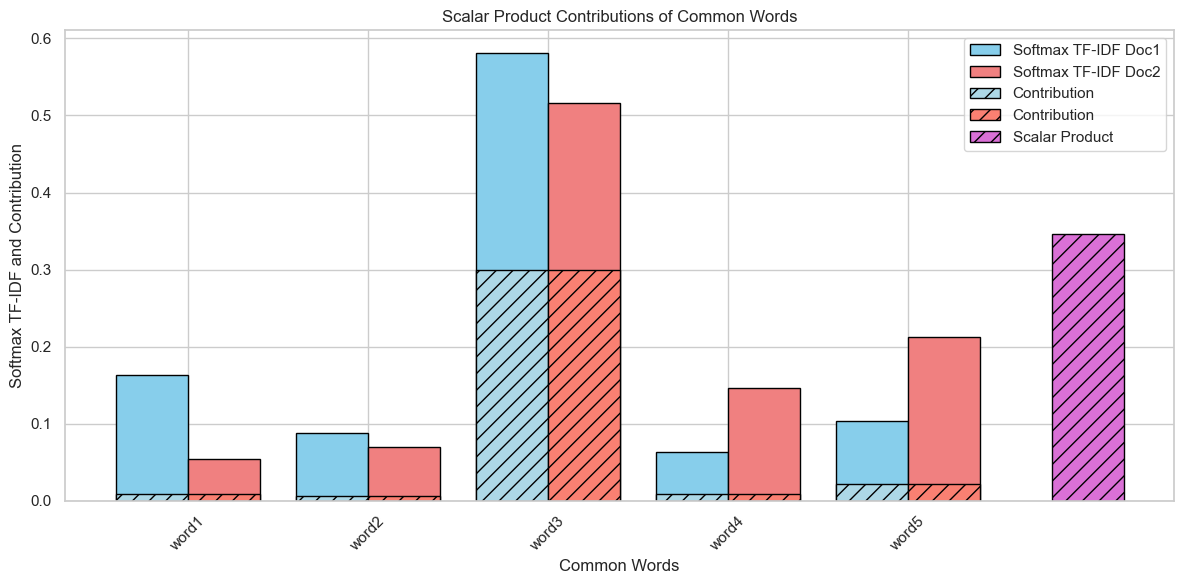

In [39]:
# Merge the softmax-normalized TF-IDF values for Document 1 and Document 2 on common words
doc1_softmax = common_words_df[common_words_df["Document"] == "Document 1"].set_index("Word")
doc2_softmax = common_words_df[common_words_df["Document"] == "Document 2"].set_index("Word")

# Compute the scalar product contributions
merged_softmax = pd.merge(
    doc1_softmax[["Softmax_TFIDF"]], 
    doc2_softmax[["Softmax_TFIDF"]], 
    left_index=True, 
    right_index=True, 
    suffixes=("_Doc1", "_Doc2")
)
merged_softmax["Contribution"] = (
    merged_softmax["Softmax_TFIDF_Doc1"] * merged_softmax["Softmax_TFIDF_Doc2"]
)

# Prepare for visualization
sns.set_theme(style="whitegrid", palette="pastel")
fig, ax = plt.subplots(figsize=(12, 6))

# Bar plot for the softmax TF-IDF values of Document 1 and Document 2
x = np.arange(len(merged_softmax))  # Positions for the words
bar_width = 0.4

# Plot Document 1 bars
bars1 = ax.bar(
    x - bar_width / 2,
    merged_softmax["Softmax_TFIDF_Doc1"],
    width=bar_width,
    color="skyblue",
    edgecolor="black",
    label="Softmax TF-IDF Doc1",
    
)

# Plot Document 2 bars
bars2 = ax.bar(
    x + bar_width / 2,
    merged_softmax["Softmax_TFIDF_Doc2"],
    width=bar_width,
    color="lightcoral",
    edgecolor="black",
    label="Softmax TF-IDF Doc2",
    
)

# Highlight contributions on top of the bars
for i in range(len(merged_softmax)):
    ax.bar(
        x[i] - bar_width / 2,
        merged_softmax["Contribution"].iloc[i],
        width=bar_width,
        color="lightblue",
        edgecolor="black",
        label="Contribution" if i == 0 else "",
        hatch="//")
    ax.bar(
        x[i] + bar_width / 2,
        merged_softmax["Contribution"].iloc[i],
        width=bar_width ,
        color="salmon",
        edgecolor="black",
        label="Contribution" if i == 0 else "",
        hatch="//"
    )
scalar_product_score = merged_softmax["Contribution"].sum()
x_extended = np.append(x, len(x))
ax.bar(
    x_extended[-1],
    scalar_product_score,
    width=bar_width,
    color="orchid",  # Changed to a lighter purple
    edgecolor="black",
    label="Scalar Product",
    hatch="//",
)
# Final plot adjustments
ax.set_xticks(x)
ax.set_xticklabels(merged_softmax.index, rotation=45)
ax.set_xlabel("Common Words")
ax.set_ylabel("Softmax TF-IDF and Contribution")
ax.set_title("Scalar Product Contributions of Common Words")
ax.legend()
plt.tight_layout()
plt.show()



In [48]:
doc1_words

{'word1', 'word2', 'word3', 'word4', 'word5'}

C:\Users\adamg\AppData\Local\Temp\ipykernel_6408\3148354394.py:18: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


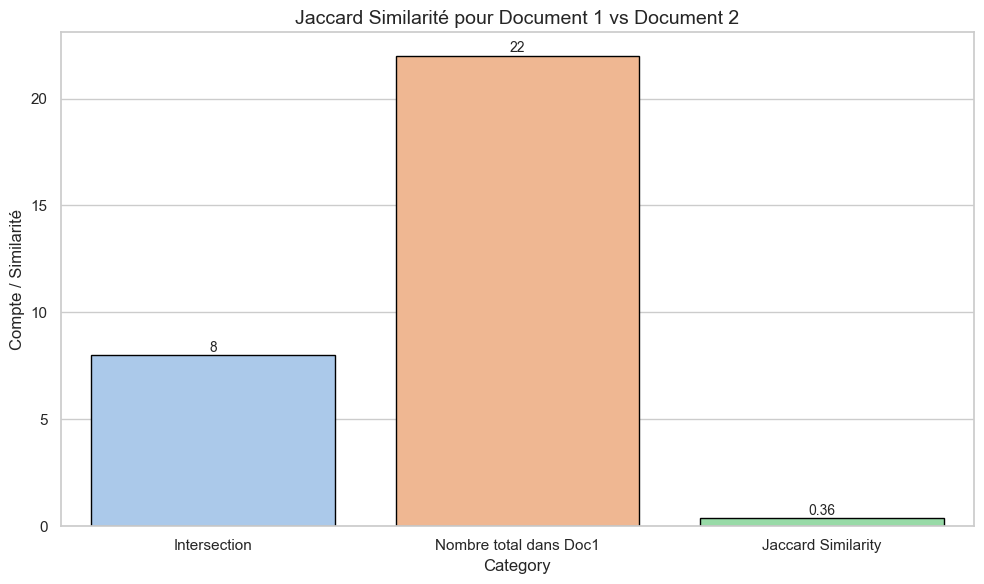

In [52]:
# Step 1: Calculate Jaccard Similarity
intersection_size = 8
total_doc1_words = 22

# Jaccard Similarity (as per the given formula)
jaccard_similarity_new = intersection_size / total_doc1_words

# Step 2: Prepare data for visualization
plot_data = pd.DataFrame({
    "Category": ["Intersection", "Nombre total dans Doc1", "Jaccard Similarity"],
    "Value": [intersection_size, total_doc1_words, jaccard_similarity_new],
})

# Step 3: Visualization
fig, ax = plt.subplots(figsize=(10, 6))

# Bar plot for counts and similarity
sns.barplot(
    x="Category",
    y="Value",
    data=plot_data,
    palette="pastel",
    ax=ax,
    edgecolor="black"
)

# Add annotations for each bar
for i, value in enumerate(plot_data["Value"]):
    ax.text(i, value + 0.02, f"{value:.2f}" if i == 2 else f"{int(value)}", ha="center", va="bottom", fontsize=10)

# Final plot adjustments
ax.set_title("Jaccard Similarité pour Document 1 vs Document 2", fontsize=14)
ax.set_ylabel("Compte / Similarité", fontsize=12)
ax.set_xlabel("Category", fontsize=12)
plt.tight_layout()
plt.show()


C:\Users\adamg\AppData\Local\Temp\ipykernel_6408\866349897.py:50: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


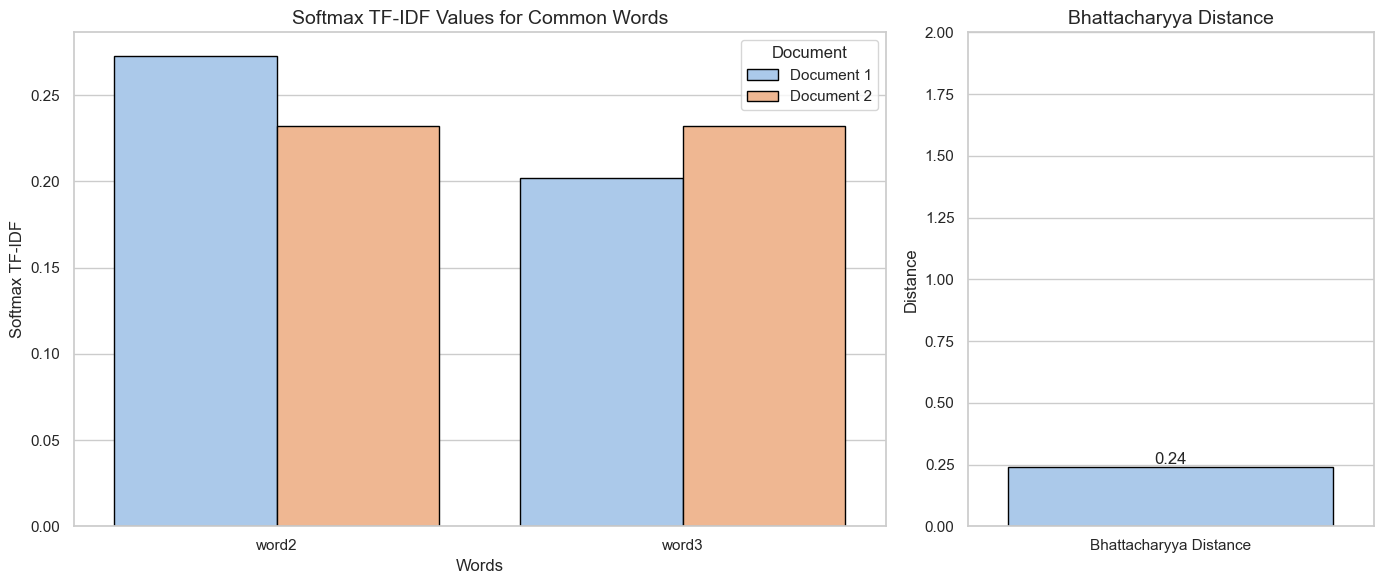

In [53]:
def apply_softmax(tfidf_values):
    """Apply softmax to a dictionary of TF-IDF values."""
    exp_values = np.exp(list(tfidf_values.values()))
    softmax_values = exp_values / np.sum(exp_values)
    return {word: softmax for word, softmax in zip(tfidf_values.keys(), softmax_values)}

# Example TF-IDF dictionaries for two documents
doc1_tfidf = {"word1": 0.3, "word2": 0.5, "word3": 0.2, "word4": 0.6}
doc2_tfidf = {"word2": 0.4, "word3": 0.4, "word5": 0.2, "word6": 0.8}

# Apply softmax to both documents
doc1_softmax = apply_softmax(doc1_tfidf)
doc2_softmax = apply_softmax(doc2_tfidf)

# Filter `doc2_softmax` to include only words in `doc1_softmax`
doc2_filtered = {word: doc2_softmax[word] for word in doc2_softmax if word in doc1_softmax}

doc1_common = {word: doc1_softmax[word] for word in doc1_softmax if word in doc2_filtered}

# Compute Bhattacharyya coefficient
bhattacharyya_coefficient = sum(
    np.sqrt(doc1_common[word] * doc2_filtered[word]) for word in doc1_common
)

# Compute Bhattacharyya Distance
bhattacharyya_distance = 1 + max(-1.0, np.log(bhattacharyya_coefficient))

# Prepare data for visualization
common_words = list(doc1_common.keys())
plot_data = pd.DataFrame({
    "Word": common_words * 2,
    "Document": ["Document 1"] * len(common_words) + ["Document 2"] * len(common_words),
    "Softmax_TFIDF": list(doc1_common.values()) + list(doc2_filtered.values()),
})

# Visualization 1: Softmax TF-IDF for common words
fig, axes = plt.subplots(1, 2, figsize=(14, 6), gridspec_kw={"width_ratios": [2, 1]})

# Bar plot for TF-IDF values
sns.barplot(
    x="Word", y="Softmax_TFIDF", hue="Document", data=plot_data,
    palette="pastel", edgecolor="black", ax=axes[0]
)
axes[0].set_title("Softmax TF-IDF Values for Common Words", fontsize=14)
axes[0].set_ylabel("Softmax TF-IDF", fontsize=12)
axes[0].set_xlabel("Words", fontsize=12)
axes[0].legend(title="Document")

# Visualization 2: Bhattacharyya Distance
sns.barplot(
    x=["Bhattacharyya Distance"], y=[bhattacharyya_distance],
    palette="pastel", edgecolor="black", ax=axes[1]
)
axes[1].set_title("Bhattacharyya Distance", fontsize=14)
axes[1].set_ylabel("Distance", fontsize=12)
axes[1].set_ylim(0, 2)

# Annotate the Bhattacharyya Distance bar
axes[1].bar_label(axes[1].containers[0], fmt="%.2f", label_type="edge")

plt.tight_layout()
plt.show()